# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse = pd.merge(mouse_metadata, study_results, on ="Mouse ID")
combined_mouse

# Display the data table for preview
combined_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = combined_mouse["Mouse ID"].value_counts()
mouse_count

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
same_time = combined_mouse.loc[combined_mouse.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
same_time

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = combined_mouse[combined_mouse.duplicated(["Mouse ID","Timepoint"])]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
mouse_g989 = combined_mouse[combined_mouse.duplicated(["Mouse ID","Timepoint"])].value_counts()
mouse_g989

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse = combined_mouse[combined_mouse["Mouse ID"]!="g989"]
combined_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(combined_mouse['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimens = combined_mouse.groupby("Drug Regimen")
tumor_mean = regimens["Tumor Volume (mm3)"].mean()
tumor_median = regimens["Tumor Volume (mm3)"].median()
tumor_var = regimens["Tumor Volume (mm3)"].var()
tumor_stdev = regimens["Tumor Volume (mm3)"].std()
tumor_SEM = regimens["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame([tumor_mean,tumor_median,tumor_var,tumor_stdev,tumor_SEM]).T
summary.columns = ["Tumor Volume Mean",
                      "Tumor Volume Median",
                      "Tumor Volume Variance",
                      "Tumor Volume Std. Dev.",
                      "Tumor Volume Std. Err."]
summary


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
advanced = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
# Using the aggregation method, produce the same summary statistics in a single line
combined_mouse.groupby("Drug Regimen").agg(advanced)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

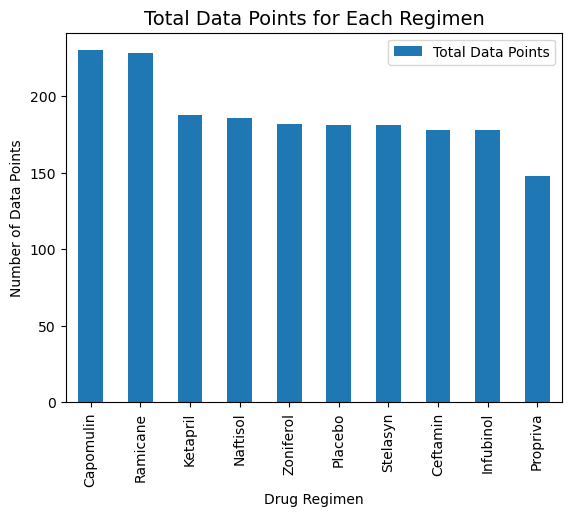

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.total_datapoints = regimen_df["Drug Regimen"].count()
total_rows = pd.DataFrame(total_rows)
total_rows.columns = ["Total Data Points"]
total_rows_plot = total_rows.sort_values("Total Data Points", ascending = False).plot(kind="bar")
total_rows_plot.set_xlabel("Drug Regimen")
total_rows_plot.set_ylabel("Number of Data Points")
plt.title("Total Data Points for Each Regimen", fontsize = 14)
plt.show()

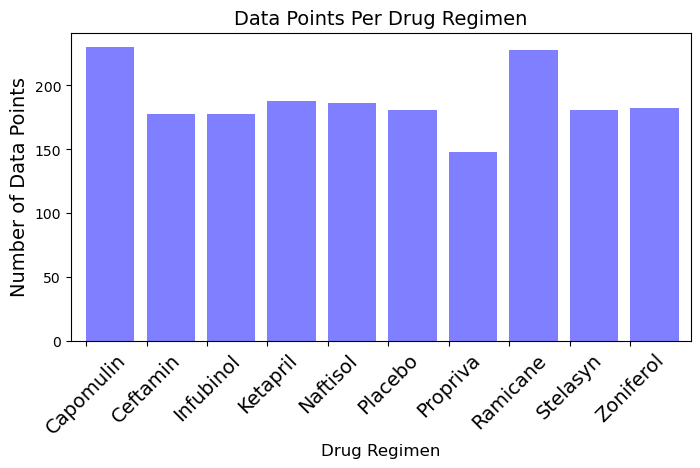

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Start by determining counts for drug regimen
total_rows = regimens["Drug Regimen"].count()
total_rows

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drugs = ['Capomulin','Ceftamin', 'Infubinol','Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
Data_points = [230, 178, 178, 188,186,181,148,228,181,182]
x_axis = np.arange (len(Drugs)) 
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,4))
plt.bar(x_axis,Data_points, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations,Drugs, rotation=45, fontsize=14)         
plt.xlim(-0.25, len(x_axis)) 
plt.title("Data Points Per Drug Regimen", fontsize=14)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Number of Data Points", fontsize=14)  
plt.show()         

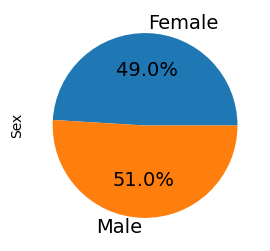

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = combined_mouse.groupby("Sex")
sex_count = sex["Sex"].count()
sex_plot = sex_count.plot(kind = "pie", y = "Sex", autopct="%1.1f%%", fontsize=14, figsize=(3, 3))

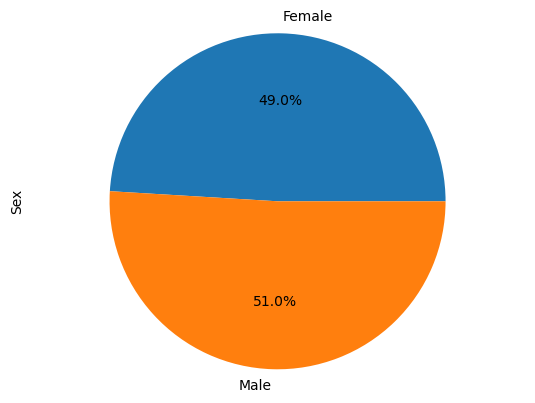

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
count = [sex_count["Female"],sex_count["Male"]]
plt.pie(count, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
top_timepoint = combined_mouse.groupby("Mouse ID")
top_timepoint = top_timepoint["Timepoint"].max()
top_timepoint = pd.DataFrame(top_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor = pd.merge(top_timepoint, combined_mouse, on = ["Mouse ID","Timepoint"])
tumor.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ceftamin', 'Infubinol', 'Ramicane']
tumor_vol_cap = []
tumor_vol_cef = []
tumor_vol_inf = []
tumor_vol_ram = []

# Create empty list to fill with tumor vol data (for plotting)
for i in range(len(tumor)-1):
    if tumor.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_vol_cap.append(tumor.loc[i, "Tumor Volume (mm3)"])
    if tumor.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_vol_cef.append(tumor.loc[i, "Tumor Volume (mm3)"])
    if tumor.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_vol_inf.append(tumor.loc[i, "Tumor Volume (mm3)"])     
    if tumor.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_vol_ram.append(tumor.loc[i, "Tumor Volume (mm3)"])
    
tumor_vol = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]  

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outliers = []
for i in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for j in range(len(tumor_vol[i])):
        if (tumor_vol[i][j] < lower_bound) or (tumor_vol[i][j] > upper_bound):
            outlier = tumor_vol[i][j]
            outlier_list.append(outlier)

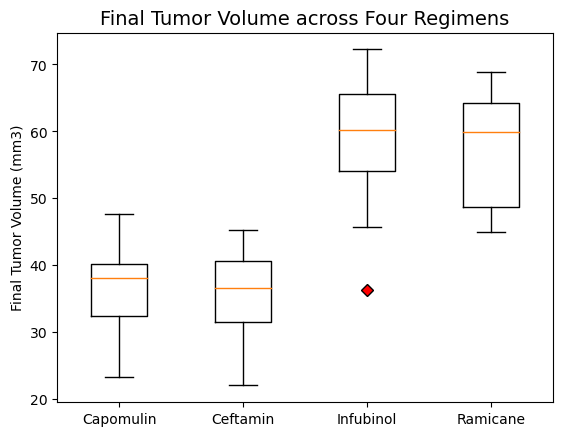

In [59]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume = dict(markerfacecolor = "r", marker = "D")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, flierprops = tumor_volume)
ax1.set_title("Final Tumor Volume across Four Regimens", fontsize = 14)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

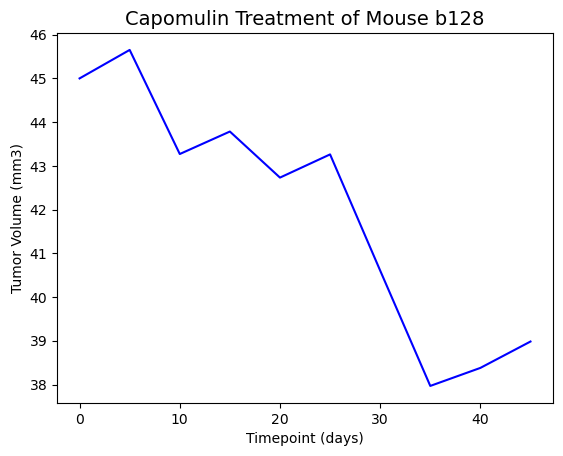

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor.loc[tumor["Drug Regimen"] == "Capomulin"].head()

b128_tumor = combined_mouse.loc[combined_mouse["Mouse ID"]=="b128"]
b128_tumor

plt.plot(b128_tumor["Timepoint"],b128_tumor["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse b128", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

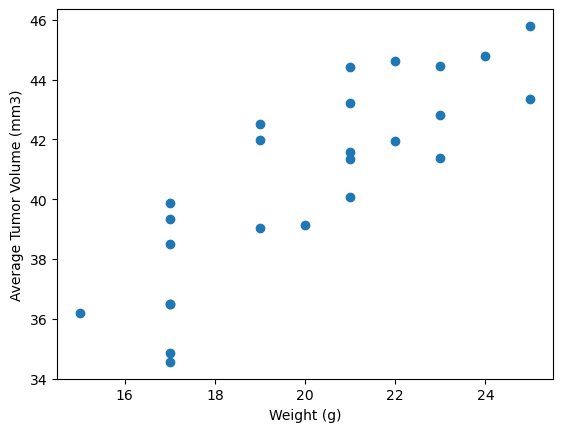

In [69]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = combined_mouse.loc[combined_mouse['Drug Regimen']=='Capomulin'].groupby('Mouse ID')
avg_tumor_capomulin = capomulin['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin['Weight (g)'].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

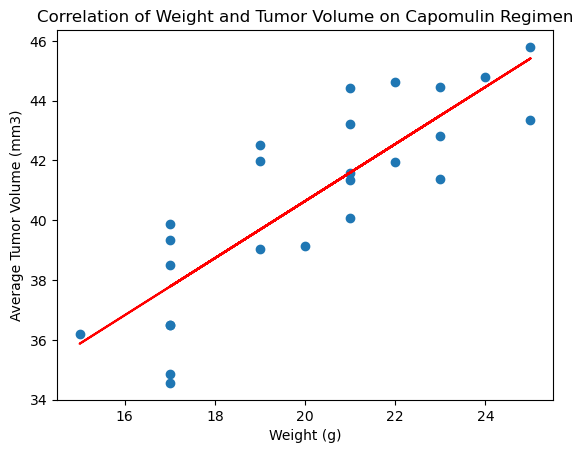

In [72]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,'r-')
plt.title("Correlation of Weight and Tumor Volume on Capomulin Regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()